In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
os.getcwd()

'C:\\Users\\Kauu\\OneDrive\\Projects\\BNF linear reg'

In [3]:
os.chdir("C:\\Users\\Kauu\\OneDrive\\Projects\\BNF linear reg")


 - Deep ITM Range : Strike <>3000
 - ITM Range : Strike <> 300
 - ATM Range : Strike <=> 69
 - OTM Range : Strike <> 300
 - Deep OTM Range : Strike <> 600


 - df Needed :
     - CE Moneyness
     - PE moneyness
     - CE OI
     - PE OI

 - Day wise Analysis on premium

 - Effect of sudden volume change 



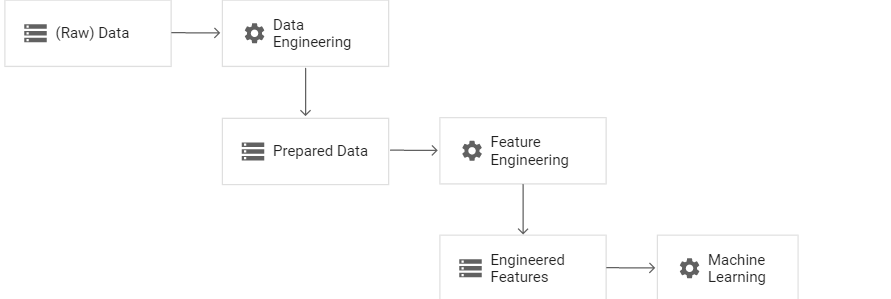

In [4]:
INT_MKT = ['^GSPC','^DJI','^VIX','^N225']

In [5]:
int_mkt = yf.download("^NSEBANK ^GSPC ^DJI  ^VIX ^N225 ^HSI ^STI ^BSESN ^FTSE ^RUT ", start="2000-01-01", end="2021-06-09",group_by='column',progress=True)
int_mkt = int_mkt["Adj Close"]
int_mkt.head()

[*********************100%***********************]  10 of 10 completed


,^BSESN,^DJI,^FTSE,^GSPC,^HSI,^N225,^NSEBANK,^RUT,^STI,^VIX
Date,,,,,,,,,,
1999-12-31,NaN,11497.120117,NaN,1469.250000,NaN,NaN,NaN,504.750000,NaN,24.639999
2000-01-03,5375.109863,11357.509766,NaN,1455.219971,17369.630859,NaN,NaN,496.420013,2582.939941,24.209999
2000-01-04,5491.009766,10997.929688,6665.899902,1399.420044,17072.820312,19002.859375,NaN,478.380005,2530.149902,27.010000
2000-01-05,5357.000000,11122.650391,6535.899902,1402.109985,15846.719727,18542.550781,NaN,478.829987,2391.030029,26.410000
2000-01-06,5421.529785,11253.259766,6447.200195,1403.449951,15153.230469,18168.269531,NaN,475.339996,2359.209961,25.730000


In [6]:
bnf_dj = int_mkt[["^DJI","^NSEBANK"]]
bnf_dj.dropna(inplace=True)
bnf_dj.head()

c:\users\kauu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,^DJI,^NSEBANK
Date,,
2007-09-17,13403.419922,6897.100098
2007-09-18,13739.389648,7059.649902
2007-09-19,13815.559570,7401.850098
2007-09-20,13766.700195,7390.149902
2007-09-21,13820.190430,7464.500000


In [7]:
bnf_dj["BNF_adjusted"] = np.NAN

c:\users\kauu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
for i in range(1,(len(bnf_dj))):
    bnf_dj["BNF_adjusted"].iloc[i] = bnf_dj["^NSEBANK"].iloc[i-1]

c:\users\kauu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
bnf_dj.head()

,^DJI,^NSEBANK,BNF_adjusted
Date,,,
2007-09-17,13403.419922,6897.100098,NaN
2007-09-18,13739.389648,7059.649902,6897.100098
2007-09-19,13815.559570,7401.850098,7059.649902
2007-09-20,13766.700195,7390.149902,7401.850098
2007-09-21,13820.190430,7464.500000,7390.149902


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd


In [11]:
bnf_dj.drop(bnf_dj.index[[0,1]])

,^DJI,^NSEBANK,BNF_adjusted
Date,,,
2007-09-19,13815.559570,7401.850098,7059.649902
2007-09-20,13766.700195,7390.149902,7401.850098
2007-09-21,13820.190430,7464.500000,7390.149902
2007-09-24,13759.059570,7650.899902,7464.500000
2007-09-25,13778.650391,7629.149902,7650.899902
...,...,...,...
2021-06-02,34600.378906,35373.750000,35337.199219
2021-06-03,34577.039062,35649.000000,35373.750000
2021-06-04,34756.390625,35291.648438,35649.000000


In [12]:
X = np.array(bnf_dj[["^DJI"]])

In [13]:
X=X.reshape(len(X),1)

In [14]:
y = bnf_dj["BNF_adjusted"]

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [18]:
regr = linear_model.LinearRegression()

In [19]:
regr.fit(X_train, y_train)

LinearRegression()

In [20]:
pred =  regr.predict(X_test)
pred

array([25608.09354315,  6648.82828156, 11476.0587765 , ...,
        9109.1856482 ,  9981.63371638, 11306.39622758])

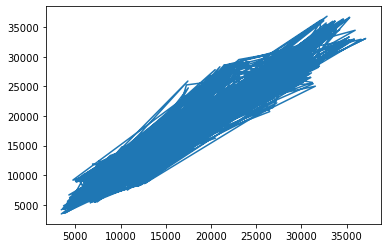

In [23]:
plt.plot(y_test,pred)